In [1]:
import pandas as pd
from pandas import Series,DataFrame
from os import getcwd
import numpy as np
from itertools import zip_longest

In [2]:
linksCSV = getcwd() + "\\resources\\links.csv"
moviesCSV = getcwd() + "\\resources\\movies.csv"
ratingsCSV = getcwd() + "\\resources\\ratings.csv"
tagsCSV = getcwd() + "\\resources\\tags.csv"

In [3]:
links = pd.read_csv(linksCSV)
movies = pd.read_csv(moviesCSV)
ratings = pd.read_csv(ratingsCSV)
tags = pd.read_csv(tagsCSV)

In [4]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [7]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [8]:
genres = movies[["genres"]]
genres

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy
...,...
9737,Action|Animation|Comedy|Fantasy
9738,Animation|Comedy|Fantasy
9739,Drama
9740,Action|Animation


In [9]:
genresSr = Series([x.split('|') for x in genres.genres])
genresSr

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Length: 9742, dtype: object

In [10]:
s = set()
for row in genresSr:
    s=s.union(row)
list_genres = list(s)
list_genres

['Horror',
 'Children',
 'Romance',
 'War',
 'Western',
 'Action',
 'Thriller',
 'Mystery',
 'Drama',
 'Adventure',
 'Fantasy',
 'Musical',
 'Documentary',
 'IMAX',
 '(no genres listed)',
 'Animation',
 'Film-Noir',
 'Sci-Fi',
 'Comedy',
 'Crime']

In [11]:
movgen = movies[["movieId","genres"]]
movgen

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
...,...,...
9737,193581,Action|Animation|Comedy|Fantasy
9738,193583,Animation|Comedy|Fantasy
9739,193585,Drama
9740,193587,Action|Animation


In [12]:
genres_matches = [movgen["genres"].str.extractall('(' + x + ')') for x in list_genres]
genres_matches

[                 0
      match        
 11   0      Horror
 21   0      Horror
 62   0      Horror
 81   0      Horror
 82   0      Horror
 ...            ...
 9651 0      Horror
 9678 0      Horror
 9681 0      Horror
 9689 0      Horror
 9699 0      Horror
 
 [978 rows x 1 columns],
                    0
      match          
 0    0      Children
 1    0      Children
 7    0      Children
 12   0      Children
 26   0      Children
 ...              ...
 9670 0      Children
 9679 0      Children
 9697 0      Children
 9708 0      Children
 9710 0      Children
 
 [664 rows x 1 columns],
                   0
      match         
 2    0      Romance
 3    0      Romance
 6    0      Romance
 10   0      Romance
 14   0      Romance
 ...             ...
 9639 0      Romance
 9660 0      Romance
 9691 0      Romance
 9715 0      Romance
 9725 0      Romance
 
 [1596 rows x 1 columns],
               0
      match     
 37   0      War
 65   0      War
 97   0      War
 124  0      W

In [13]:
genres_df_t = DataFrame(map(list, zip_longest(*[[movgen["movieId"][a] for a,b in x.index.values] for x in genres_matches])),columns=list_genres)
genres_df_t

,Horror,Children,Romance,War,Western,Action,Thriller,Mystery,Drama,Adventure,Fantasy,Musical,Documentary,IMAX,(no genres listed),Animation,Film-Noir,Sci-Fi,Comedy,Crime
0,12.0,1.0,3.0,41.0,163.0,6.0,6.0,22.0,4,1.0,1.0,48.0,77.0,150.0,114335.0,1.0,164.0,24.0,1.0,6.0
1,22.0,2.0,4.0,73.0,210.0,9.0,10.0,29.0,11,2.0,2.0,107.0,99.0,364.0,122888.0,13.0,320.0,29.0,3.0,16.0
2,70.0,8.0,7.0,110.0,266.0,10.0,20.0,32.0,14,8.0,29.0,199.0,108.0,595.0,122896.0,48.0,347.0,32.0,4.0,20.0
3,92.0,13.0,11.0,151.0,303.0,15.0,21.0,47.0,16,10.0,44.0,242.0,116.0,1797.0,129250.0,239.0,913.0,66.0,5.0,21.0
4,93.0,27.0,15.0,155.0,368.0,20.0,22.0,50.0,17,13.0,60.0,346.0,128.0,3159.0,132084.0,313.0,922.0,76.0,7.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
genres_df = DataFrame([[movgen["movieId"][a] for a,b in x.index.values] for x in genres_matches],index=list_genres)
genres_df

,0,1,2,3,4,5,6,7,8,9,...,4351,4352,4353,4354,4355,4356,4357,4358,4359,4360
Horror,12,22,70,92,93,152,177,183,188,196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Children,1,2,8,13,27,34,38,48,54,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Romance,3,4,7,11,15,17,25,28,39,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
War,41,73,110,151,155,157,161,214,266,336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western,163,210,266,303,368,383,416,432,458,487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action,6,9,10,15,20,23,42,44,66,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thriller,6,10,20,21,22,23,32,45,47,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mystery,22,29,32,47,50,103,113,123,159,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drama,4,11,14,16,17,20,22,24,25,26,...,187031.0,188675.0,189043.0,189713.0,190207.0,190213.0,190215.0,193567.0,193571.0,193585.0
Adventure,1,2,8,10,13,15,29,44,53,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
genres_count = genres_df_t.count().sort_values()
genres_count

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

<AxesSubplot:>

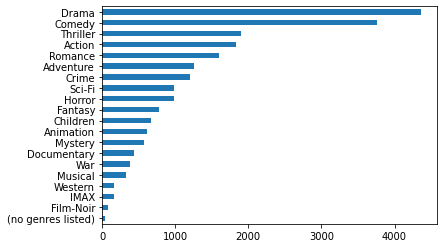

In [16]:
genres_count.plot(kind='barh',rot=0)

In [17]:
thrillers = Series(genres_df_t["Thriller"].dropna().astype(int))
thrillers

0            6
1           10
2           20
3           21
4           22
         ...  
1889    185033
1890    187031
1891    189333
1892    189381
1893    190183
Name: Thriller, Length: 1894, dtype: int32

In [18]:
rating_id = ratings[["movieId","rating"]]
rating_id

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
100831,166534,4.0
100832,168248,5.0
100833,168250,5.0
100834,168252,5.0


In [19]:
rating_genres = rating_id.merge(thrillers,left_on='movieId',right_on='Thriller')
del rating_genres["Thriller"]
rating_genres_titles = rating_genres.merge(movies[["movieId","title"]],on='movieId')
rating_genres_titles

,movieId,rating,title
0,6,4.0,Heat (1995)
1,6,4.0,Heat (1995)
2,6,5.0,Heat (1995)
3,6,4.0,Heat (1995)
4,6,4.0,Heat (1995)
...,...,...,...
26447,145951,0.5,Bloodsport: The Dark Kumite (1999)
26448,158721,3.5,Gen-X Cops (1999)
26449,160341,2.5,Bloodmoon (1997)
26450,160836,3.0,Hazard (2005)


In [20]:
mean_rating_thrillers = rating_genres_titles.groupby(['movieId','title']).mean()
mean_rating_thrillers

,,rating
movieId,title,
6,Heat (1995),3.946078
10,GoldenEye (1995),3.496212
20,Money Train (1995),2.500000
21,Get Shorty (1995),3.494382
22,Copycat (1995),3.222222
...,...,...
185033,I Kill Giants (2018),2.000000
187031,Jurassic World: Fallen Kingdom (2018),3.250000
189333,Mission: Impossible - Fallout (2018),3.750000


In [21]:
mean_rating_thrillergenre = float(mean_rating_thrillers.mean())
mean_rating_thrillergenre

3.1561160994630217

In [22]:
best_ranked_thrillers = mean_rating_thrillers[mean_rating_thrillers.rating == float(mean_rating_thrillers.max())]
best_ranked_thrillers

,,rating
movieId,title,
496,What Happened Was... (1994),5.0
876,Supercop 2 (Project S) (Chao ji ji hua) (1993),5.0
1631,"Assignment, The (1997)",5.0
5416,Cherish (2002),5.0
6021,"American Friend, The (Amerikanische Freund, Der) (1977)",5.0
6086,"I, the Jury (1982)",5.0
27704,Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003),5.0
27751,'Salem's Lot (2004),5.0
53280,"Breed, The (2006)",5.0


In [23]:
worst_ranked_thrillers = mean_rating_thrillers[mean_rating_thrillers.rating == float(mean_rating_thrillers.min())]
worst_ranked_thrillers

,,rating
movieId,title,
5105,Don't Look Now (1973),0.5
5771,My Bloody Valentine (1981),0.5
7114,"Collector, The (1965)",0.5
7636,Raising Cain (1992),0.5
8772,"Spy Who Came in from the Cold, The (1965)",0.5
31424,Alone in the Dark (2005),0.5
54274,I Know Who Killed Me (2007),0.5
61818,"Crow, The: Wicked Prayer (2005)",0.5
65350,"General Died at Dawn, The (1936)",0.5
